In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat, get_dummies
sns.set_theme(style='ticks', context='notebook', font_scale=1.2)

## Section 1: Behavior

In [2]:
## Define parameters.
sessions = ['s1', 's2', 's3']

## Iteratively load data.
data = concat([read_csv(os.path.join('data', session, 'pgng.csv'))
               for session in ['s1','s2','s3']])

## Restrict participants.
reject = read_csv(os.path.join('data', 's1', 'reject.csv'))
data = data[data.subject.isin(reject.query('reject==0').subject)].reset_index(drop=True)

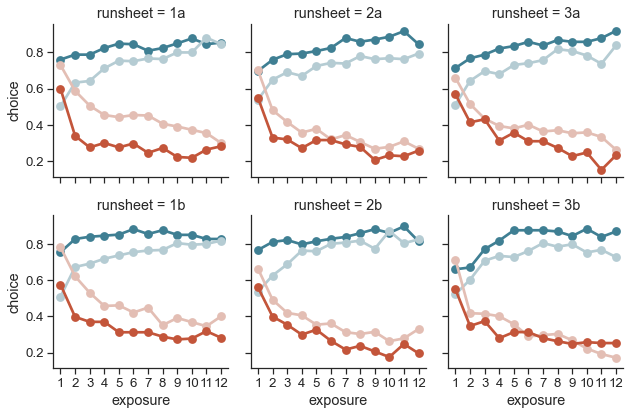

In [3]:
g = sns.FacetGrid(data, col='runsheet', col_order=['1a','2a','3a','1b','2b','3b'], col_wrap=3)
palette = sns.diverging_palette(220, 20, n=4)

g.map(sns.pointplot, 'exposure', 'choice', 'robot', order=np.arange(12)+1,
      hue_order=['gw','gal','ngw','ngal'], palette=palette, ci=None)

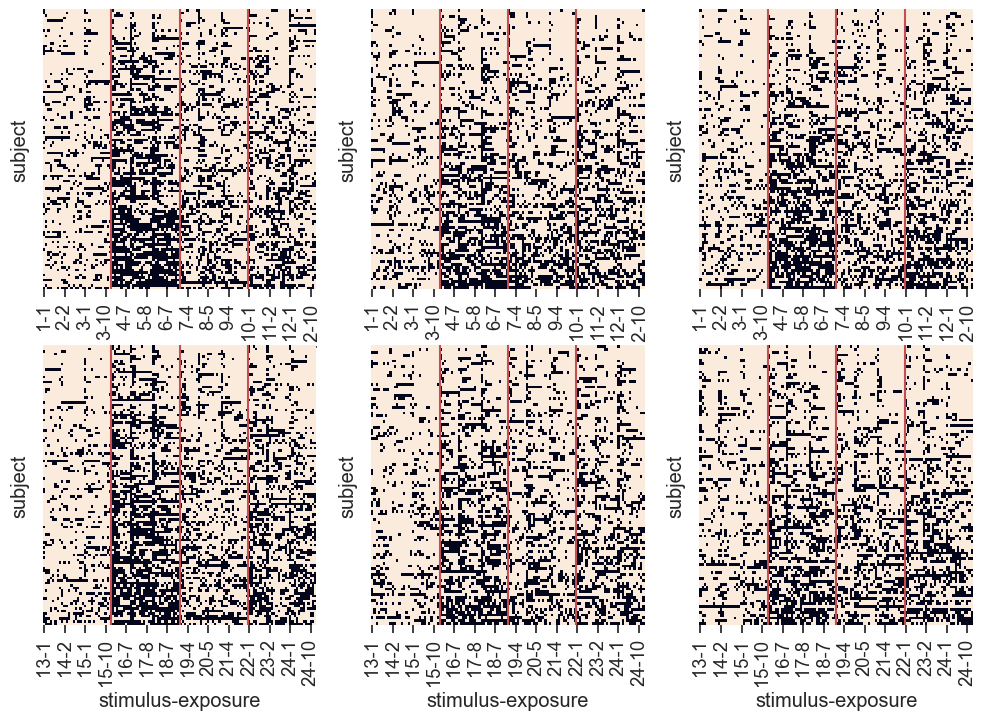

In [45]:
pivot = data.pivot_table('accuracy', 'subject', ['runsheet','stimulus','exposure'])

fig, axes = plt.subplots(2,3,figsize=(12,8))

for ax, rs in zip(axes.flatten(), ['1a','2a','3a','1b','2b','3b']):

    arr = pivot.loc[pivot[rs].mean(axis=1).sort_values(ascending=False).index,rs]
    sns.heatmap(arr.dropna(axis=0), cbar=False, yticklabels=[], ax=ax)
    for i in [30,60,90]: ax.axvline(i, color='r')

In [43]:
arr.dropna(axis=0)

stimulus                   13                                      14       \
exposure                   1    2    3    4    5    6    7    8    1    2    
subject                                                                      
l8nfpatptckhefvtrmz4oyo1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
osc4pdikkighfdrjz2bunxs8  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0   
xjfwo1k2qutfq0emv06h25g4  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0   
qsmez4ay7ijmavboe2sk03f9  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
dg58euc52ltsfp866il0jlml  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
aiwtf29fpjnkies83n9z0s14  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
1x8zaa76pikfxwotrhhxcogi  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
jaapgnx6r3fl1yumbsgijc2c  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
achbubafg4n6r26s03j6fr1v  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
72yuyu49877hzl64v55frwns  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   

stimulus                  ...   24                                          \
exposure                  ...   3    4    5    6    7    8    9    10   11   
subject                   ...                                                
l8nfpatptckhefvtrmz4oyo1  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
osc4pdikkighfdrjz2bunxs8  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
xjfwo1k2qutfq0emv06h25g4  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
qsmez4ay7ijmavboe2sk03f9  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
dg58euc52ltsfp866il0jlml  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
aiwtf29fpjnkies83n9z0s14  ...  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1x8zaa76pikfxwotrhhxcogi  ...  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0   
jaapgnx6r3fl1yumbsgijc2c  ...  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
achbubafg4n6r26s03j6fr1v  ...  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
72yuyu49877hzl64v55frwns  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

stimulus                       
exposure                   12  
subject                        
l8nfpatptckhefvtrmz4oyo1  1.0  
osc4pdikkighfdrjz2bunxs8  1.0  
xjfwo1k2qutfq0emv06h25g4  1.0  
qsmez4ay7ijmavboe2sk03f9  1.0  
dg58euc52ltsfp866il0jlml  1.0  
...                       ...  
aiwtf29fpjnkies83n9z0s14  0.0  
1x8zaa76pikfxwotrhhxcogi  0.0  
jaapgnx6r3fl1yumbsgijc2c  0.0  
achbubafg4n6r26s03j6fr1v  0.0  
72yuyu49877hzl64v55frwns  0.0  

[99 rows x 120 columns]

In [4]:
data = data.sort_values(['subject','runsheet','trial'])

f = lambda x: np.append(0, np.roll(x * 2 - 1, 1)[1:])
data['y'] = data.groupby(['subject','runsheet']).choice.transform(f)

data['bias'] = 0
for i in np.unique(data.stimulus):
    data[f'y{i}'] = np.where(data.stimulus == i, 0, data.y)
    data[f'y{i}'] = data.groupby(['subject','runsheet'])[f'y{i}'].transform(np.cumsum)
    data.loc[data.stimulus==i, 'bias'] = data.loc[data.stimulus==i, f'y{i}']
    data = data.drop(columns=f'y{i}')
data = data.drop(columns=f'y')

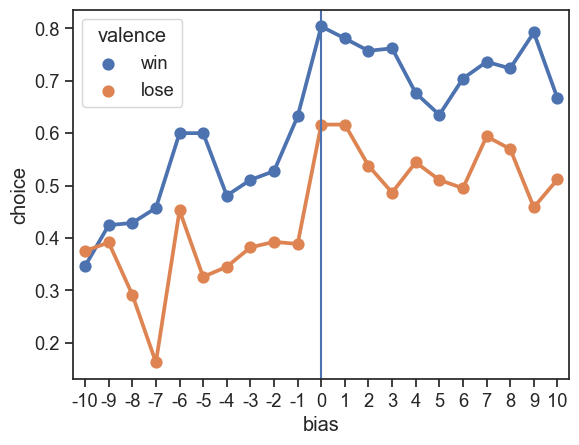

In [15]:
agg = {'choice': 'mean', 'trial': 'count'}
gb = data.query('exposure == 1').groupby(['valence','bias']).agg(agg).reset_index()
ax = sns.pointplot(x='bias', y='choice', hue='valence', data=gb, 
                   order=np.arange(-10,11), hue_order=['win','lose'])
ax.axvline(10)

In [19]:
from statsmodels.api import Logit

formula = 'choice ~ valence + bias'
fit = Logit.from_formula(formula, data=data.query('bias >= -10 and bias <= 10 and exposure == 2')).fit()
fit.summary2()

Optimization terminated successfully.
         Current function value: 0.672111
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.021     
Dependent Variable: choice           AIC:              6528.1646 
Date:               2023-02-21 19:55 BIC:              6547.6260 
No. Observations:   4852             Log-Likelihood:   -3261.1   
Df Model:           2                LL-Null:          -3329.8   
Df Residuals:       4849             LLR p-value:      1.3946e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.1274   0.0427 -2.9859 0.0028 -0.2109 -0.0438
valence[T.win]     0.6656   0.0587 11.3354 0.0000  0.5505  0.7807
bias               0.0207   0.0070  2.9448 0.0032  0.0069  0.0345
=================================================================

"""

In [ ]:
fig, axes = plt.subplots(2,2)

for ax, robot in zip(axes.flatten(), ['gw','ngw','gal','ngal']):
    df = data.query(f'robot == "{robot}"').copy()
    df = df.pivot_table('choice','bias','exposure').loc[np.linspace(-10,10,11)]
    df -= df.values.mean()
    sns.heatmap(df, center=0, vmin=-0.5, vmax=0.5, xticklabels=[], cbar=False, ax=ax)
    ax.invert_yaxis()
    ax.set_title(robot)
    
plt.tight_layout()

In [ ]:
data.pivot_table('choice', 'subject', ['robot','session'])['gal'].corr()

In [ ]:
from statsmodels.api import Logit

formula = 'choice ~ exposure * bias'
fit = Logit.from_formula(formula, data=data.query('robot == "ngal" and bias >= -15 and bias <= 15')).fit()
fit.summary2()

## Section 2: Logistic regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Define convenience functions.
def inv_logit(arr):
    return 1. / (1 + np.exp(-arr))

def phi_coef(cmat):
    [[n11, n10], [n01, n00]] = cmat
    a = (n11 * n00) - (n10 * n01)
    b = np.sqrt((n11+n10) * (n01+n00) * (n11+n01) * (n10+n00))
    return a / b

## Format data.
normalize = lambda x: (x - x.min()) / (x.max() - x.min())
data['action'] = data.action.replace({'go': 0.5, 'no-go': -0.5})
data['valence'] = data.valence.replace({'win': 0.5, 'lose': -0.5})
data['exposure'] = normalize(data.exposure) - 0.5

## Define predictors.
data['x11'] = 1
data['x12'] = data.action.values
data['x13'] = data.valence.values
data['x14'] = data.action.values * data.valence.values * 2
data['x15'] = data.exposure.values
data[[f'x2{i+1}' for i in range(3)]] = get_dummies(data.rune_set)

## Define metadata.
N = len(data)
M1 = len(data.filter(regex='x1[0-9]').T)
M2 = len(data.filter(regex='x2[0-9]').T)
J = np.unique(data.subject, return_inverse=True)[-1]
K = np.unique(data.session, return_inverse=True)[-1]

## Define data.
Y = data.accuracy.values.astype(int)

## Define design matrix.
X1 = data.filter(regex='x1[0-9]').values
X2 = data.filter(regex='x2[0-9]').values

### 2.2 Accuracy-coded

In [ ]:
## Load Stan samples.
samples = read_csv(os.path.join('stan_results', 'logit.tsv.gz'), sep='\t', compression='gzip')

## Extract parameters.
beta_mu_01 = samples.filter(regex='beta_mu_01').values
beta_mu_02 = samples.filter(regex='beta_mu_02').values
beta = samples.filter(regex='beta\[').values.reshape(-1, J.max()+1, K.max()+1, M1, order='F')

#### Baseline model (fixed effects)

In [ ]:
## Compute linear predictor.
mu = X1 @ beta_mu_01.mean(axis=0)

## Compute predicted outcomes.
Y_hat = np.where(inv_logit(mu) > Y.mean(), 1, 0)

## Calculate confusion matrix.
cmat = confusion_matrix(Y, Y_hat)

print('Classification accuracy = %0.3f' %accuracy_score(Y, Y_hat))
print('phi = %0.3f' % phi_coef(cmat))

#### Between-particiapnt effects (rune sets)

In [ ]:
## Compute linear predictor.
mu = X1 @ beta_mu_01.mean(axis=0) + X2 @ beta_mu_02.mean(axis=0)

## Compute predicted outcomes.
Y_hat = np.where(inv_logit(mu) > Y.mean(), 1, 0)

## Calculate confusion matrix.
cmat = confusion_matrix(Y, Y_hat)

print('Classification accuracy = %0.3f' %accuracy_score(Y, Y_hat))
print('phi = %0.3f' % phi_coef(cmat))

#### Within-participant effects (sessions)

In [ ]:
## Compute average across participants.
beta_k = np.apply_over_axes(np.mean, beta, [0,1]).squeeze()

## Compute linear predictor.
mu = X1 @ beta_mu_01.mean(axis=0) + X2 @ beta_mu_02.mean(axis=0)
for n in range(N):
    mu[n] = X1[n] @ (beta_mu_01.mean(axis=0) + beta_k[K[n]])
    
## Compute predicted outcomes.
Y_hat = np.where(inv_logit(mu) > Y.mean(), 1, 0)

## Calculate confusion matrix.
cmat = confusion_matrix(Y, Y_hat)

print('Classification accuracy = %0.3f' %accuracy_score(Y, Y_hat))
print('phi = %0.3f' % phi_coef(cmat))

#### Within-participant effects (partipants)

In [ ]:
## Compute average across sessions.
beta_j = np.apply_over_axes(np.mean, beta, [0,2]).squeeze()

## Compute linear predictor.
mu = X1 @ beta_mu_01.mean(axis=0) + X2 @ beta_mu_02.mean(axis=0)
for n in range(N):
    mu[n] = X1[n] @ (beta_mu_01.mean(axis=0) + beta_j[J[n]])
    
## Compute predicted outcomes.
Y_hat = np.where(inv_logit(mu) > Y.mean(), 1, 0)

## Calculate confusion matrix.
cmat = confusion_matrix(Y, Y_hat)

print('Classification accuracy = %0.3f' %accuracy_score(Y, Y_hat))
print('phi = %0.3f' % phi_coef(cmat))

#### Complete model 

In [ ]:
## Compute linear predictor.
mu = X1 @ beta_mu_01.mean(axis=0) + X2 @ beta_mu_02.mean(axis=0)
for n in range(N):
    mu[n] = X1[n] @ (beta_mu_01.mean(axis=0) + beta[:,J[n],K[n]].mean(axis=0))
    
## Compute predicted outcomes.
Y_hat = np.where(inv_logit(mu) > Y.mean(), 1, 0)

## Calculate confusion matrix.
cmat = confusion_matrix(Y, Y_hat)

print('Classification accuracy = %0.3f' %accuracy_score(Y, Y_hat))
print('phi = %0.3f' % phi_coef(cmat))

In [ ]:
mu_11 = np.var(X1 @ beta_mu_01.mean(axis=0))
mu_12 = np.var(X2 @ beta_mu_02.mean(axis=0))


mu_20 = np.zeros(N)
for n in range(N): mu_20[n] = X1[n] @ beta[:,J[n],K[n]].mean(axis=0)
mu_20 = np.var(mu_20)  

mu_21 = np.zeros(N)
beta_j = np.apply_over_axes(np.mean, beta, [0,2]).squeeze()
for n in range(N): mu_21[n] = X1[n] @ beta_j[J[n]]
mu_21 = np.var(mu_21)  

mu_22 = np.zeros(N)
beta_k = np.apply_over_axes(np.mean, beta, [0,1]).squeeze()
for n in range(N): mu_22[n] = X1[n] @ beta_k[K[n]]
mu_22 = np.var(mu_22) 

sigma = 3.29

In [ ]:
## Fixed-effects
(mu_11) / (mu_11 + mu_12 + mu_20 + sigma)

In [ ]:
## Between-effects
(mu_12) / (mu_11 + mu_12 + mu_20 + sigma)

In [ ]:
(mu_20) / (mu_11 + mu_12 + mu_20 + sigma)

In [ ]:
(mu_21) / (mu_11 + mu_12 + mu_20 + sigma)

In [ ]:
(mu_22) / (mu_11 + mu_12 + mu_20 + sigma)

In [ ]:
(mu_21) / (mu_20)

In [ ]:
beta_k = beta.mean(axis=1)

In [ ]:
from arviz import hdi

i = 4

np.apply_along_axis(hdi, 0, beta_mu_01[...,i].reshape(-1,1) + beta_k[...,i], hdi_prob=0.95)

In [ ]:
beta_k.shape